# 텐서플로우 (Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나

- 구글이 주도적으로 개발하는 플랫폼

- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원

- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)

- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤

## 텐서플로우 아키텍쳐

<img src="https://developers.google.com/machine-learning/crash-course/images/TFHierarchy.svg">

<sub>출처: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit</sub>

## 텐서플로우 시작하기

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
print(tf.__version__)

2.6.0


### 텐서(Tensor)의 객체
- 타입(Type): `string`, `float32`, `float16`, `int32`, `int8` 등

- 형상(Shape): 0, 1, 2차원 등의 데이터 차원 

- 축(Rank): 차원의 개수

### 텐서의 차원과 연산

In [3]:
a = tf.constant(2)
print(tf.rank(a))
print(a)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [4]:
b = tf.constant([2, 3])
print(tf.rank(b))
print(b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)


In [5]:
c = tf.constant([[2, 3], [6, 7]])
print(tf.rank(c))
print(c)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[2 3]
 [6 7]], shape=(2, 2), dtype=int32)


In [6]:
d = tf.constant(['Hello'])
print(tf.rank(d))
print(d)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([b'Hello'], shape=(1,), dtype=string)


### 난수 생성

In [8]:
rand = tf.random.uniform([1], 0, 1)
print(rand.shape)
print(rand)

(1,)
tf.Tensor([0.9579996], shape=(1,), dtype=float32)


In [9]:
rand2 = tf.random.normal([1, 2], 0, 1) # shape, mean, stddev
print(rand2.shape)
print(rand2)

(1, 2)
tf.Tensor([[ 1.7843182 -0.3533296]], shape=(1, 2), dtype=float32)


In [11]:
rand3 = tf.random.normal(shape=(3, 2), mean=0, stddev=1)
print(rand3.shape)
print(rand3)

(3, 2)
tf.Tensor(
[[ 0.00551937 -0.59386575]
 [ 0.24939714  0.6708401 ]
 [-1.1510667  -0.4335758 ]], shape=(3, 2), dtype=float32)


### 즉시 실행 모드 (Eager Mode) 지원
- 즉시 실행모드를 통해 텐서플로우를 파이썬처럼 사용할 수 있음

- 1.x 버전에서는 '그래프'를 생성하고, 초기화 한 뒤에 세션을 통해 **값을 흐르게 하는 작업**을 진행해야함


In [12]:
a = tf.constant(3)
b = tf.constant(2)

In [13]:
print(tf.add(a, b))
print(a + b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [14]:
print(tf.subtract(a, b))
print(a - b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [15]:
print(tf.multiply(a, b))
print(a * b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


### 텐서 플로우 ↔ 넘파이
- `numpy()`
- `tf.convet_to_tensor()`

In [16]:
c = tf.add(a, b).numpy()
print(type(c))

<class 'numpy.int32'>


In [18]:
c_square = np.square(c, dtype=np.float32)
c_tensor = tf.convert_to_tensor(c_square)

print(c_tensor)
print(type(c_tensor))

tf.Tensor(25.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### 넘파이처럼 사용하기


In [19]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'float32'>


In [20]:
print(t[:, 1:])

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)


In [21]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [22]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [24]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [25]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### 타입 변환
- 텐서의 기본 dtype
  - float형 텐서: `float32`
  - int형 텐서: `int32`

- 연산시 텐서의 타입을 맞춰줘야 함
  - `float32` ~ `float32`
  - `int32` ~ `int32`
  - `flot32` ~ `int32` (x)

- 타입변환에는 `tf.cast()` 사용

In [27]:
a = tf.constant(2)
b = tf.constant(2.)
print(a)
print(b)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [30]:
# tf.constant(2.) + tf.constant(2)

In [33]:
# tf.constant(2.) + tf.constant(2., dtype=tf.float64)

In [34]:
t = tf.constant(30., dtype=tf.float64)
t2 = tf.constant(2.)

print(tf.cast(t, dtype=tf.float32) + t2)

tf.Tensor(32.0, shape=(), dtype=float32)


### AutoGraph (오토그래프)

- Tensorflow가 작업을 좀 더 빠르게 동작하게 하기 위한 방법으로 Graph로 만들어 연산을 진행

- `tf.Graph`

- 유연성이 있음

  - 모바일 애플리케이션, 임베디드 기기, 백엔드 서버와 같이 Python 인터프리터가 없는 환경에서 Tensorflow 사용 가능 

In [35]:
import timeit

### @tf.function
- 자동으로 그래프를 생성(Auto Graph)

- 그래프로 변환하여 사용 -> GPU 연산 가능

- 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능


- 원본 함수가 필요하다면 `(tf.function).python_function()`

In [37]:
@tf.function
def my_function(x):
    return x**2 -10*x + 3

print(my_function(2))
print(my_function(tf.constant(2)))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


In [38]:
def my_function_(x):
    return x**2 -10*x + 3

print(my_function_(2))
print(my_function_(tf.constant(2)))

-13
tf.Tensor(-13, shape=(), dtype=int32)


In [40]:
tf_my_func = tf.function(my_function_)

print(tf_my_func)
print(tf_my_func(2))

tf.Tensor(-13, shape=(), dtype=int32)


In [41]:
tf_my_func.python_function(2)

-13

In [44]:
def function_to_get_faster(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

a_function_that_uses_a_graph = tf.function(function_to_get_faster)
x1 = tf.constant([[1., 2.]])
y1 = tf.constant([[4.], [5.]])
b1 = tf.constant(4.)

a_function_that_uses_a_graph(x1, y1, b1).numpy()

array([[18.]], dtype=float32)

In [46]:
def inner_function(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

@tf.function
def outer_function(x):
    y = tf.constant([[4.], [5.]])
    b = tf.constant(4.) 
    return inner_function(x, y, b)

outer_function(tf.constant([[1., 2.]])).numpy()

array([[18.]], dtype=float32)

텐서플로우가 `tf.function`으로 변환한 코드

In [48]:
print(tf.autograph.to_code(my_function.python_function))

def tf__my_function(x):
    with ag__.FunctionScope('my_function', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)




 속도 향상


In [50]:
class SequentialModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super(SequentialModel, self).__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
        self.dense_1 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.dense_2 = tf.keras.layers.Dense(10)

    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.dropout(x)
        x = self.dense_2(x)
        return x

input_data = tf.random.uniform([60, 28, 28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print("Eager time:", timeit.timeit(lambda:eager_model(input_data), number=10000))
print("Graph time:", timeit.timeit(lambda:graph_model(input_data), number=10000))

Eager time: 18.835210449999977
Graph time: 8.30889167999976


### 변수 생성

- `tf.Variable`
- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사용

In [51]:
X = tf.Variable(20.0)
print(X)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


### Autograd (자동 미분)

- `tf.GradientTape` API를 사용
- `tf.Variable` 같은 일부 입력에 대한 기울기 계산
  - 기본적으로 한번만 사용됨
- 변수가 포함된 연산만 기록

In [52]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2

In [53]:
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [55]:
# x2 = tf.Variable(4.)
# dy_dx = tape.gradient(y, x)
# dy_dx.numpy()

In [58]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y_sq = y**2
    z = x**2 + tf.stop_gradient(y_sq)

grad = tape.gradient(z, {'x':x, 'y':y})

print('dz/dx:', grad['x'])
print('dz/dy:', grad['y'])

dz/dx: tf.Tensor(4.0, shape=(), dtype=float32)
dz/dy: None


In [188]:
weights = tf.Variable(tf.random.normal((3, 2)), name='weights')
biases = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
    y = x @ weights + biases
    loss = tf.reduce_mean(y**2)

In [189]:
[dl_dw, dl_db] = tape.gradient(loss, [weights, biases])

In [190]:
print(weights.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [196]:
del tape

## 간단한 신경망 구조 

### 뉴런
- 입력 → 연산 → 활성화함수 → 출력

In [211]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def Neuron(x, W, bias=0):
    z = x * W + bias
    return sigmoid(z)

In [212]:
x = tf.random.normal((1, 2), 0, 1)
W = tf.random.normal((1, 2), 0, 1)

print(x.shape)
print(W.shape)

print(x)
print(W)

print(Neuron(x, W))

(1, 2)
(1, 2)
tf.Tensor([[1.1401309 2.4728029]], shape=(1, 2), dtype=float32)
tf.Tensor([[-0.58266205 -0.40084976]], shape=(1, 2), dtype=float32)
[[0.33977184 0.27067068]]


In [213]:
x = tf.random.normal((2, 1), 0, 1)
W = tf.random.normal((2, 1), 0, 1)

print(x.shape)
print(W.shape)

print(x)
print(W)

print(Neuron(x, W))

(2, 1)
(2, 1)
tf.Tensor(
[[-0.7824349]
 [-0.6772485]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.29066992]
 [0.16555256]], shape=(2, 1), dtype=float32)
[[0.44338626]
 [0.47199923]]


In [214]:
x = tf.random.normal((1,), 0, 1)
W = tf.random.normal((1, 2), 0, 1)

print(x.shape)
print(W.shape)

print(x)
print(W)

print(Neuron(x, W))

(1,)
(1, 2)
tf.Tensor([-1.0191058], shape=(1,), dtype=float32)
tf.Tensor([[ 0.09772497 -0.08771219]], shape=(1, 2), dtype=float32)
[[0.47512254 0.52233213]]


### 퍼셉트론 학습 알고리즘 (가중치 업데이트)

## $\qquad w^{(next step)} = w + \eta \ (y - \tilde{y}) \ x$

- $w \ $: 가중치

- $\eta \ $ : 학습률

- $y \ $ : 정답 레이블

- $\tilde{y} \ $: 예측 레이블


In [215]:
x = 1
y = 0
W = tf.random.normal([1], 0, 1)
print(Neuron(x, W))
print('y:', y)

[0.57535005]
y: 0


In [216]:
for i in range(1000):
    output = Neuron(x, W)
    error = y - output
    W = W + 0.1 * error * x

    if i % 100 == 99:
        print('{}\t{}\t{}'.format(i+1, error, output))

100	[-0.10750252]	[0.10750252]
200	[-0.05380338]	[0.05380338]
300	[-0.03549631]	[0.03549631]
400	[-0.02639827]	[0.02639827]
500	[-0.02098298]	[0.02098298]
600	[-0.01739855]	[0.01739855]
700	[-0.01485374]	[0.01485374]
800	[-0.01295485]	[0.01295485]
900	[-0.01148433]	[0.01148433]
1000	[-0.01031229]	[0.01031229]


In [219]:
def Neuron2(x, W, bias=0):
    z = tf.matmul(x, W, transpose_b=True) + bias
    return sigmoid(z)

In [224]:
x = tf.random.normal((1, 3), 0, 1)
y = tf.ones(1)
W = tf.random.normal((1, 3), 0, 1)

print(Neuron2(x, W))
print("y:", y)

[[0.37088948]]
y: tf.Tensor([1.], shape=(1,), dtype=float32)


In [225]:
for i in range(1000):
    output = Neuron2(x, W)
    error = y - output
    W = W + 0.1 * error * x

    if i % 100 == 99:
        print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.45822698]]	[[0.541773]]
200	[[0.33644617]]	[[0.66355383]]
300	[[0.2569952]]	[[0.7430048]]
400	[[0.20431787]]	[[0.79568213]]
500	[[0.16794169]]	[[0.8320583]]
600	[[0.14175117]]	[[0.85824883]]
700	[[0.12218785]]	[[0.87781215]]
800	[[0.10711366]]	[[0.89288634]]
900	[[0.09519279]]	[[0.9048072]]
1000	[[0.08555794]]	[[0.91444206]]


In [226]:
x = tf.random.normal((1, 3), 0, 1)
weights = tf.random.normal((1, 3), 0, 1)
bias = tf.zeros((1, 1))
y = tf.ones((1, ))

print("x\t: {}\nweights\t: {}\nbias\t: {}".format(x, weights, bias))

x	: [[-0.1844618  -1.6017714   0.20122375]]
weights	: [[-0.11100892 -2.227262    0.7351874 ]]
bias	: [[0.]]


In [227]:
for i in range(1000):
    output = Neuron2(x, weights, bias=bias)
    error = y - output
    weights = weights + 0.1 * error * x
    bias = bias + 0.1 * error

    if i % 100 == 99:
        print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.0127449]]	[[0.9872551]]
200	[[0.0087297]]	[[0.9912703]]
300	[[0.00663453]]	[[0.99336547]]
400	[[0.00534898]]	[[0.994651]]
500	[[0.00448012]]	[[0.9955199]]
600	[[0.0038538]]	[[0.9961462]]
700	[[0.00338089]]	[[0.9966191]]
800	[[0.00301129]]	[[0.9969887]]
900	[[0.0027144]]	[[0.9972856]]
1000	[[0.00247079]]	[[0.9975292]]


In [228]:
print("x\t: {}\nweights\t: {}\nbias\t: {}".format(x, weights, bias))

x	: [[-0.1844618  -1.6017714   0.20122375]]
weights	: [[-0.22581843 -3.224207    0.8604291 ]]
bias	: [[0.62240237]]


### AND Gate

In [234]:
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[1], [0], [0], [0]])

W = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0

    for j in range(4):
        output = sigmoid(np.sum(X[j]*W) + b_x + b)
        error = Y[j][0] - output
        W = W + X[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error

    if i % 200 == 0:
        print("Epoch {:4d}\tError Sum {}".format(i, error_sum))

print("\n가중치\t:{}".format(W))
print("\n편향\t:{}".format(b))


Epoch    0	Error Sum [-1.5249026]
Epoch  200	Error Sum [-0.11858908]
Epoch  400	Error Sum [-0.06852526]
Epoch  600	Error Sum [-0.04810126]
Epoch  800	Error Sum [-0.03694557]
Epoch 1000	Error Sum [-0.02993229]
Epoch 1200	Error Sum [-0.02512719]
Epoch 1400	Error Sum [-0.02163343]
Epoch 1600	Error Sum [-0.0189828]
Epoch 1800	Error Sum [-0.01690365]

가중치	:[6.9517922 6.954959 ]

편향	:[-11.606874]


In [235]:
for i in range(4):
    print("X: {} Y: {} Ouput: {}".format(X[i], Y[i], sigmoid(np.sum(X[i]*W)+ b + b_x)))

X: [1 1] Y: [1] Ouput: [0.96442467]
X: [1 0] Y: [0] Ouput: [0.02520752]
X: [0 1] Y: [0] Ouput: [0.02528545]
X: [0 0] Y: [0] Ouput: [2.4744699e-05]


### OR Gate

In [236]:
X2 = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y2 = np.array([[1], [1], [1], [0]])

W2 = tf.random.normal([2], 0, 1)
b2 = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0

    for j in range(4):
        output = sigmoid(np.sum(X2[j]*W2) + b_x + b2)
        error = Y2[j][0] - output
        W2 = W2 + X2[j] * 0.1 * error
        b2 = b2 + b_x * 0.1 * error
        error_sum += error

    if i % 200 == 0:
        print("Epoch {:4d}\tError Sum {}".format(i, error_sum))

print("\n가중치\t:{}".format(W2))
print("\n편향\t:{}".format(b2))


Epoch    0	Error Sum [0.22575694]
Epoch  200	Error Sum [-0.04814874]
Epoch  400	Error Sum [-0.02547637]
Epoch  600	Error Sum [-0.01721254]
Epoch  800	Error Sum [-0.01295248]
Epoch 1000	Error Sum [-0.01036394]
Epoch 1200	Error Sum [-0.0086287]
Epoch 1400	Error Sum [-0.00738684]
Epoch 1600	Error Sum [-0.00645394]
Epoch 1800	Error Sum [-0.00572991]

가중치	:[8.214405 8.213754]

편향	:[-4.641511]


In [237]:
for i in range(4):
    print("X: {} Y: {} Ouput: {}".format(X2[i], Y2[i], sigmoid(np.sum(X2[i]*W2)+ b2 + b_x)))

X: [1 1] Y: [1] Ouput: [0.99999726]
X: [1 0] Y: [1] Ouput: [0.9897775]
X: [0 1] Y: [1] Ouput: [0.989771]
X: [0 0] Y: [0] Ouput: [0.02554315]


### XOR Gate

In [238]:
X3 = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y3 = np.array([[0], [1], [1], [0]])

W3 = tf.random.normal([2], 0, 1)
b3 = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0

    for j in range(4):
        output = sigmoid(np.sum(X3[j]*W3) + b_x + b3)
        error = Y3[j][0] - output
        W3 = W3 + X3[j] * 0.1 * error
        b3 = b3 + b_x * 0.1 * error
        error_sum += error

    if i % 200 == 0:
        print("Epoch {:4d}\tError Sum {}".format(i, error_sum))

print("\n가중치\t:{}".format(W3))
print("\n편향\t:{}".format(b3))

Epoch    0	Error Sum [-1.4889969]
Epoch  200	Error Sum [-0.00617796]
Epoch  400	Error Sum [-0.00025105]
Epoch  600	Error Sum [-1.013279e-05]
Epoch  800	Error Sum [-8.34465e-07]
Epoch 1000	Error Sum [-1.013279e-06]
Epoch 1200	Error Sum [-1.013279e-06]
Epoch 1400	Error Sum [-1.013279e-06]
Epoch 1600	Error Sum [-1.013279e-06]
Epoch 1800	Error Sum [-1.013279e-06]

가중치	:[ 5.1279660e-02 -2.0749867e-06]

편향	:[-0.9999969]


In [239]:
for i in range(4):
    print("X: {} Y: {} Ouput: {}".format(X3[i], Y3[i], sigmoid(np.sum(X3[i]*W3)+ b3 + b_x)))

X: [1 1] Y: [0] Ouput: [0.5128174]
X: [1 0] Y: [1] Ouput: [0.51281786]
X: [0 1] Y: [1] Ouput: [0.50000024]
X: [0 0] Y: [0] Ouput: [0.5000008]


In [253]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(111)

X4 = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y4 = np.array([[0], [1], [1], [0]])

model = Sequential([Dense(units=2, activation='sigmoid', input_shape=(2, )),
                    Dense(units=1, activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [254]:
history = model.fit(X4, Y4, epochs=2000, batch_size=1, verbose=0)

In [255]:
model.predict(X4)

array([[0.43348765],
       [0.7176386 ],
       [0.71228504],
       [0.17752445]], dtype=float32)

## 시각화 사용

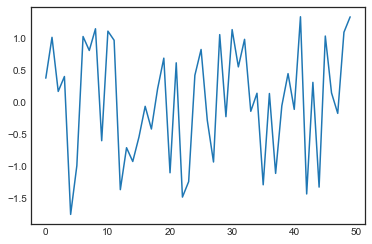

In [267]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = range(50)
y = tf.random.normal([50], 0, 1)

plt.plot(x, y)
plt.show()

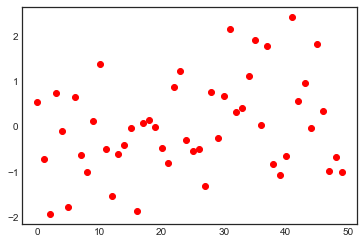

In [268]:
x = range(50)
y = tf.random.normal([50], 0, 1)

plt.plot(x, y, 'ro')
plt.show()

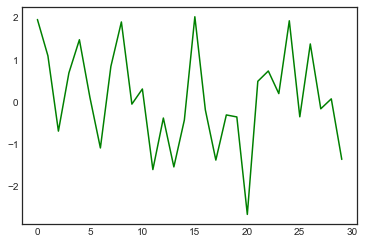

In [269]:
x = range(30)
y = tf.random.normal([30], 0, 1)

plt.plot(x, y, 'g-')
plt.show()

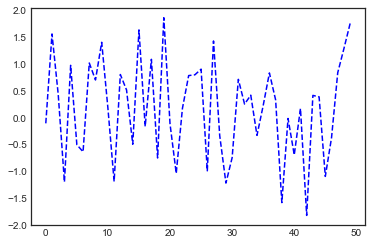

In [270]:
x = range(50)
y = tf.random.normal([50], 0, 1)

plt.plot(x, y, 'b--')
plt.show()

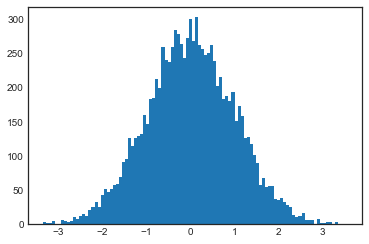

In [280]:
random_normal = tf.random.normal([10000], 0, 1)
plt.hist(random_normal.numpy(), bins=100)
plt.show()

### XOR Gate의 'LOSS' 시각화


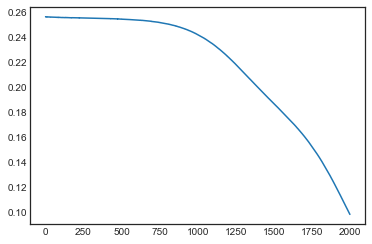

In [265]:
plt.plot(history.history['loss'])